# First Data Analysis

## Loading data and formatting

In [77]:
# import
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
DATA_PATH = Path("/home/pl/MVA/Medic/data/") # insert path to data folder

In [34]:
metrics = pd.read_excel(DATA_PATH/"Metrics par patient.xlsx") # Read metrics file

In [35]:
metrics.head()

,Identité,Participant,Class,Age,Sexe,diagnostic,Average duration of whole fixations,Number of whole fixations,Number of saccades,Average peak velocity of saccades,...,Maximum amplitude of saccades,Total amplitude of saccades,Time to first saccade,Direction of first saccade,Peak velocity of first saccade,Average velocity of first saccade,Amplitude of first saccade,Minimum peak velocity of saccades,Maximum peak velocity of saccades,Standard deviation of peak velocity of saccades
0,G1_C1_BARMar_22022017,1.0,Contrôle,29,F,Contrôle,200.0,2290.0,1244.0,139.09,...,31.40,5398.52,105.0,31.46,280.42,161.24,6.71,30.04,825.81,120.94
1,G2_P1_LEBAla_23022017,2.0,Patient,57,H,LPR,124.0,1555.0,427.0,106.42,...,18.88,908.94,375.0,39.24,81.61,75.67,1.79,30.00,1416.50,124.05
2,G3_C2_FORCla_27022017,3.0,Contrôle,40,F,Contrôle,243.0,3979.0,2909.0,183.33,...,30.50,13601.63,775.0,270.97,228.32,153.85,6.33,30.02,1240.43,144.64
3,G4_P2_CHANic_02032017,4.0,Patient,67,F,LPR,180.0,2178.0,904.0,111.46,...,35.74,2196.99,8606.0,58.69,33.41,33.41,0.52,30.02,1682.88,175.61
4,G5_C3_FAKAzi_03032017,5.0,Contrôle,70,H,Contrôle,323.0,3497.0,2572.0,136.58,...,36.56,11451.62,245.0,166.80,265.57,154.23,7.61,30.05,898.65,115.26


In [62]:
control_df = metrics.loc[metrics["Class"] == "Contrôle"] # Control group
patient_df = metrics.loc[metrics["Class"] == "Patient"] # Patient group

In [71]:
# remove useless features
remove_features = ["Identité", "Participant", "Class", "Lunettes", "BNP", "Score Gateau", "Age", "Sexe", "diagnostic"]
control_features = control_df.drop(columns=remove_features)
patient_features = patient_df.drop(columns=remove_features)

## Mean and std

In [104]:
# rescale to compare
control_features /= control_features.max()
patient_features /= patient_features.max()

In [105]:
# compute mean
patient_mean = patient_features.mean()
patient_mean_df = pd.DataFrame({"Features": patient_mean.index, "Mean patient": patient_mean.values})

control_mean = control_features.mean()
control_mean_df = pd.DataFrame({"Features": control_mean.index, "Mean control": control_mean.values})

merged_mean = pd.merge(control_mean_df, patient_mean_df, on="Features")

In [106]:
# compute std
patient_std = patient_features.std()
patient_std_df = pd.DataFrame({"Features": patient_std.index, "Std patient": patient_std.values})

control_std = control_features.std()
control_std_df = pd.DataFrame({"Features": control_std.index, "Std control": control_std.values})

merged_std = pd.merge(control_std_df, patient_std_df, on="Features")

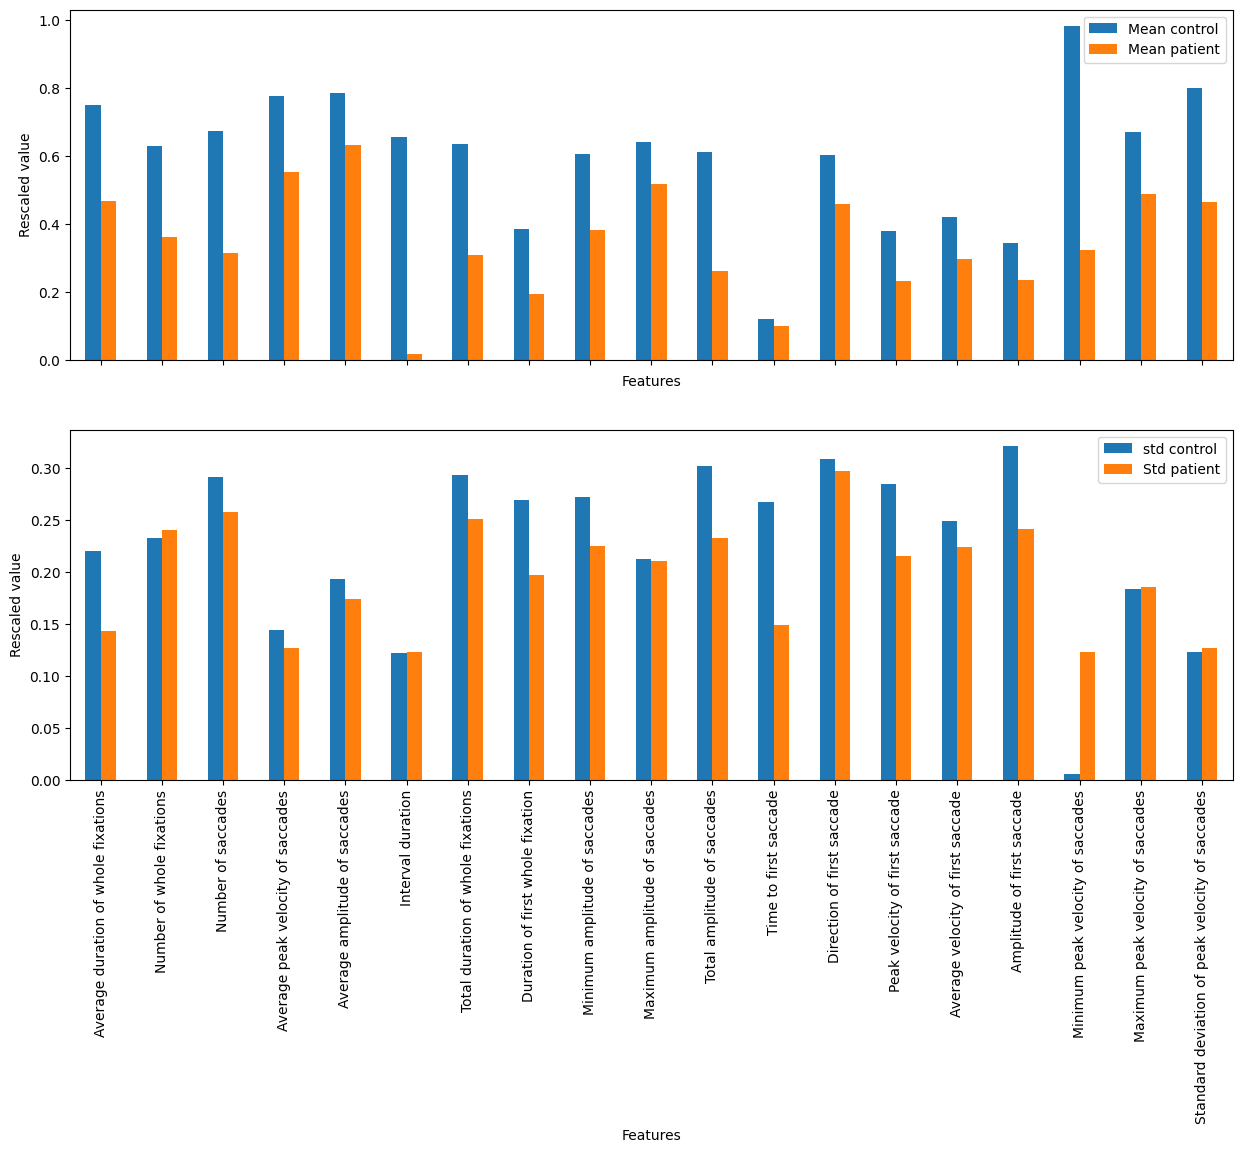

In [115]:
fig, ax = plt.subplots(figsize=(15,10), nrows=2)
merged_mean.plot.bar(ax=ax[0], x="Features")
merged_std.plot.bar(ax=ax[1], x="Features")
ax[0].set_ylabel("Rescaled value")
ax[0].set_xticklabels(labels="")
ax[1].set_ylabel("Rescaled value")
fig.savefig("figures/mean_std.png", dpi=180)

## Features extraction

In [113]:
# get feature dataframes
control_features = control_df.drop(columns=remove_features)
patient_features = patient_df.drop(columns=remove_features)